In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
user_eng= pd.read_csv('takehome_user_engagement.csv');

In [3]:
user=pd.read_csv('takehome_users.csv',encoding="latin");

In [4]:
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
user_eng.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [6]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


The user_id and object_id are comman features of the two data frame.

In [8]:
#changing the date time format
user_eng.time_stamp = user_eng.time_stamp.astype('datetime64')
user.creation_time = user.creation_time.astype('datetime64')
user.last_session_creation_time = pd.to_datetime(user.last_session_creation_time, \
                                                      unit='s')

In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [10]:
user.isnull().values.any()

True

In [11]:
user.last_session_creation_time.isnull().values.any()

True

In [12]:
user_eng.isnull().values.any()

False

In [13]:
#Will group by the 'user_id' which shows how many times he/she logged in and then collect the data for >3 
user_id_bool = pd.Series.to_dict(user_eng.groupby('user_id').visited.count() >= 3)

In [14]:
#Will map this boolian series to user_eng dataframe and creat a column for multiple (>3) logins
user_eng['multiple_logins'] = user_eng.user_id.map(user_id_bool)

In [15]:
user_eng.head()

,time_stamp,user_id,visited,multiple_logins
0,2014-04-22 03:53:30,1,1,False
1,2013-11-15 03:45:04,2,1,True
2,2013-11-29 03:45:04,2,1,True
3,2013-12-09 03:45:04,2,1,True
4,2013-12-25 03:45:04,2,1,True


In [16]:
#Getting all the multiple logins user
active_user = user_eng[user_eng.multiple_logins == True]

In [17]:
active_user.head()

,time_stamp,user_id,visited,multiple_logins
1,2013-11-15 03:45:04,2,1,True
2,2013-11-29 03:45:04,2,1,True
3,2013-12-09 03:45:04,2,1,True
4,2013-12-25 03:45:04,2,1,True
5,2013-12-31 03:45:04,2,1,True


In [18]:
#Difference between 'time_stamp' for each user

active_user = active_user.copy()
active_user.loc[:,'Diff'] =active_user.groupby('user_id').time_stamp.diff().dt.days
active_user.head()

,time_stamp,user_id,visited,multiple_logins,Diff
1,2013-11-15 03:45:04,2,1,True,NaN
2,2013-11-29 03:45:04,2,1,True,14.0
3,2013-12-09 03:45:04,2,1,True,10.0
4,2013-12-25 03:45:04,2,1,True,16.0
5,2013-12-31 03:45:04,2,1,True,6.0


In [19]:
#Collecting those users who was active for consicutive 7 days
active_user_7day = active_user[active_user.Diff <= 7]

In [20]:
#Count the number of logins that satisfy the above criteria
active_user_count = pd.DataFrame(active_user_7day.groupby('user_id')['user_id'].count())


In [21]:
#Rename column and reset index
active_user_count = active_user_count.rename(columns={'user_id':'count'})
active_user_count = active_user_count.reset_index()


In [22]:
#Find the list of adopted users who have more than 3 logins in a 7 day period
adopted_users = active_user_count[active_user_count['count'] >= 3]
len(adopted_users)

1688

In [23]:
adopted_users.head()

,user_id,count
0,2,6
1,10,280
2,20,4
3,33,16
4,42,339


In [24]:
#Will section out the adopted users from users dataframe
users_interest= user.loc[user['object_id'].isin(adopted_users.user_id)]

In [25]:
#Add a column with 1 for adopted_users. 
users_interest.insert(10, 'adopted_user', 1) #position, title, value

In [26]:
#get the index of the adopted users
users_series = users_interest[['adopted_user']]

In [27]:
users_series.head()

,adopted_user
1,1
9,1
19,1
32,1
41,1


In [28]:
#concatenate this column onto end of complete user dataframe, then fill in remaining values with 0
adopted_user = pd.concat([user, users_series], axis=1)
adopted_user['adopted_user'].fillna(0, inplace=True )

In [29]:
adopted_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                12000 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)


In [30]:

print(adopted_user['creation_source'].value_counts())

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64


In [31]:
#Change floats back to ints
adopted_user['invited_by_user_id'].fillna(0, inplace=True )
adopted_user['invited_by_user_id'] = adopted_user['invited_by_user_id'].astype('int64')
adopted_user['adopted_user'] = adopted_user['adopted_user'].astype('int64')
adopted_user['creation_source'] = adopted_user['creation_source'].astype('category')
adopted_user['opted_in_to_mailing_list'] = adopted_user['opted_in_to_mailing_list'].astype('category')
adopted_user['enabled_for_marketing_drip'] = adopted_user['enabled_for_marketing_drip'].astype('category')

In [32]:

#process email addresses to kep only domain names, and convert to categorical type
adopted_user['domain'] = adopted_user.email.str.split('@').str[1]
adopted_user['domain'] = adopted_user['domain'].astype('str')
adopted_user = adopted_user.drop('email', axis=1)

In [33]:
#Convert datetime to timedelta
creation_time_min = adopted_user.creation_time.min()

adopted_user['creation_timedelta'] = (adopted_user['creation_time'] - \
                                creation_time_min).dt.days.astype(int)
adopted_user.drop('creation_time', axis=1, inplace=True)

In [34]:

adopted_user.drop('last_session_creation_time', axis=1, inplace=True)
adopted_user.head()

,object_id,name,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,domain,creation_timedelta
0,1,Clausen August,GUEST_INVITE,1,0,11,10803,0,yahoo.com,691
1,2,Poole Matthew,ORG_INVITE,0,0,1,316,1,gustr.com,533
2,3,Bottrill Mitchell,ORG_INVITE,0,0,94,1525,0,gustr.com,292
3,4,Clausen Nicklas,GUEST_INVITE,0,0,1,5151,0,yahoo.com,355
4,5,Raw Grace,GUEST_INVITE,0,0,193,5240,0,yahoo.com,231


In [35]:

#split out 'creation_source' values into dummy variables
adopted_user = pd.get_dummies(adopted_user, columns=['creation_source'])
adopted_user.head()

,object_id,name,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,domain,creation_timedelta,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,Clausen August,1,0,11,10803,0,yahoo.com,691,1,0,0,0,0
1,2,Poole Matthew,0,0,1,316,1,gustr.com,533,0,1,0,0,0
2,3,Bottrill Mitchell,0,0,94,1525,0,gustr.com,292,0,1,0,0,0
3,4,Clausen Nicklas,0,0,1,5151,0,yahoo.com,355,1,0,0,0,0
4,5,Raw Grace,0,0,193,5240,0,yahoo.com,231,1,0,0,0,0


In [36]:
#Finally drop names and convert all categorical to type categorical
adopted_user.drop('name', axis=1, inplace=True)

In [37]:
adopted_user[['creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', \
                'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', \
                'creation_source_SIGNUP_GOOGLE_AUTH']] = \
        adopted_user[['creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', \
                'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', \
                'creation_source_SIGNUP_GOOGLE_AUTH']].astype('category')

In [38]:
adopted_user.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,domain,creation_timedelta,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,10803,0,yahoo.com,691,1,0,0,0,0
1,2,0,0,1,316,1,gustr.com,533,0,1,0,0,0
2,3,0,0,94,1525,0,gustr.com,292,0,1,0,0,0
3,4,0,0,1,5151,0,yahoo.com,355,1,0,0,0,0
4,5,0,0,193,5240,0,yahoo.com,231,1,0,0,0,0


In [39]:
#Encode domain names as dummy variables
domain_counts = adopted_user["domain"].value_counts()
other_domains =  domain_counts.index[domain_counts <= 2]
adopted_user.loc[adopted_user["domain"].isin(other_domains), "domain"] = "other"

In [40]:
adopted_user['domain'] = adopted_user['domain'].astype('category')
adopted_user = pd.get_dummies(adopted_user, columns=['domain'])

In [41]:
adopted_user.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_timedelta,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,domain_cuvox.de,domain_gmail.com,domain_gustr.com,domain_hotmail.com,domain_jourrapide.com,domain_other,domain_yahoo.com
0,1,1,0,11,10803,0,691,1,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,1,316,1,533,0,1,0,0,0,0,0,1,0,0,0,0
2,3,0,0,94,1525,0,292,0,1,0,0,0,0,0,1,0,0,0,0
3,4,0,0,1,5151,0,355,1,0,0,0,0,0,0,0,0,0,0,1
4,5,0,0,193,5240,0,231,1,0,0,0,0,0,0,0,0,0,0,1


In [42]:
#convert invited_by_user_id into yes/no
adopted_user['invited'] = np.where(adopted_user['invited_by_user_id']==0, 0, 1)
#remove object_id (user_id) and invited_by_user_id
adopted_user.drop(['object_id', 'invited_by_user_id'], axis=1, inplace=True)

In [43]:
adopted_user.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,creation_timedelta,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,domain_cuvox.de,domain_gmail.com,domain_gustr.com,domain_hotmail.com,domain_jourrapide.com,domain_other,domain_yahoo.com,invited
0,1,0,11,0,691,1,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,1,1,533,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,94,0,292,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,355,1,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,193,0,231,1,0,0,0,0,0,0,0,0,0,0,1,1


In [44]:
#Normalizing timedelta
adopted_user['creation_timedelta'] = (adopted_user['creation_timedelta'] - \
(adopted_user['creation_timedelta']).min()) / np.ptp(adopted_user['creation_timedelta'])

#Normalizing  org_id
adopted_user['org_id'] = (adopted_user['org_id'] - \
(adopted_user['org_id']).min()) / np.ptp(adopted_user['org_id'])

## Classification

# Logistic Regression

In [45]:

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression


In [46]:
adopted_user.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,creation_timedelta,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,domain_cuvox.de,domain_gmail.com,domain_gustr.com,domain_hotmail.com,domain_jourrapide.com,domain_other,domain_yahoo.com,invited
0,1,0,0.026442,0,0.947874,1,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0.002404,1,0.731139,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0.225962,0,0.400549,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0.002404,0,0.486968,1,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0.463942,0,0.316872,1,0,0,0,0,0,0,0,0,0,0,1,1


In [47]:
y = np.array(adopted_user['adopted_user'])
X = adopted_user.drop('adopted_user', axis=1)

In [48]:
#train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [49]:
logreg = LogisticRegression(solver='liblinear', random_state=27)

In [50]:
#Gridsearch CV
#Hyper parameter search space
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hypers = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hypers, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target vector
best_model.predict(X)

Best Penalty: l1
Best C: 1.0


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
logreg2 = LogisticRegression(solver='liblinear', penalty='l1', C=1, random_state=27)

In [52]:
logreg2.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=27, solver='liblinear')

In [53]:
logreg2.score(X_train, y_train)

0.8579166666666667

In [54]:
logreg2.score(X_test, y_test)

0.865

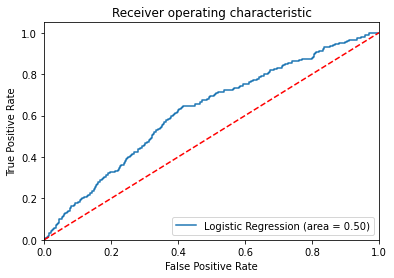

In [55]:
logit_roc_auc = roc_auc_score(y_test, logreg2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [56]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics



In [57]:
clf=RandomForestClassifier(n_estimators=100, random_state=27)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=27)

In [58]:
clf.score(X_train, y_train)

0.9997916666666666

In [59]:
clf.score(X_test, y_test)

0.8475

In [60]:
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(f"Confusion matrix: \n{metrics.confusion_matrix(y_test, y_pred)}")

Accuracy: 0.8475
Confusion matrix: 
[[2017   59]
 [ 307   17]]


In [61]:
cols = adopted_user.columns.tolist()
cols2 = cols[:3] + cols[4:]
cols2

['opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'org_id',
 'creation_timedelta',
 'creation_source_GUEST_INVITE',
 'creation_source_ORG_INVITE',
 'creation_source_PERSONAL_PROJECTS',
 'creation_source_SIGNUP',
 'creation_source_SIGNUP_GOOGLE_AUTH',
 'domain_cuvox.de',
 'domain_gmail.com',
 'domain_gustr.com',
 'domain_hotmail.com',
 'domain_jourrapide.com',
 'domain_other',
 'domain_yahoo.com',
 'invited']

In [62]:
feature_imp = pd.Series(clf.feature_importances_,index=cols2).sort_values(ascending=False)
feature_imp

creation_timedelta                    0.470815
org_id                                0.423838
opted_in_to_mailing_list              0.020713
enabled_for_marketing_drip            0.015275
domain_other                          0.006813
domain_hotmail.com                    0.006778
domain_gmail.com                      0.006645
domain_yahoo.com                      0.006544
creation_source_PERSONAL_PROJECTS     0.006292
domain_jourrapide.com                 0.006186
domain_gustr.com                      0.005762
domain_cuvox.de                       0.005530
creation_source_GUEST_INVITE          0.004822
creation_source_ORG_INVITE            0.004344
creation_source_SIGNUP                0.004295
invited                               0.003183
creation_source_SIGNUP_GOOGLE_AUTH    0.002165
dtype: float64

(0.0, 0.1)

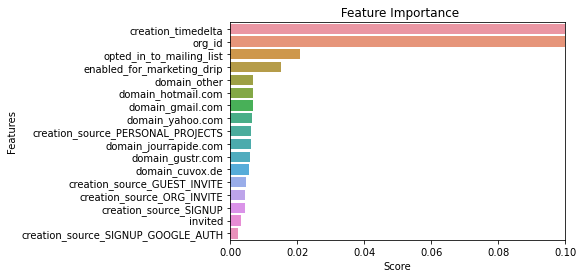

In [63]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Score')
plt.ylabel('Features')
plt.title(" Feature Importance")
#plt.legend()
plt.xlim(0, 0.1)

# Results

Preliminary tests show random forest classification perform better than logistic regression for predicting adopted users. Important features identified from the random forest classification include the account creation time, the organization id, and whether the user opted in for the mailing list and marketing drip.